# Iris: prediction of plant species

#### We develop a model that predicts the specie of iris plant according to its attributes.

We load the dataset and explore some of its statistics.

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import tensorflow as tf

In [2]:
data = pd.read_table('iris.csv', sep=',')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.loc[:,'Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
unique_species = data.loc[:, 'Species'].unique()
unique_species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'SepalWidthCm')

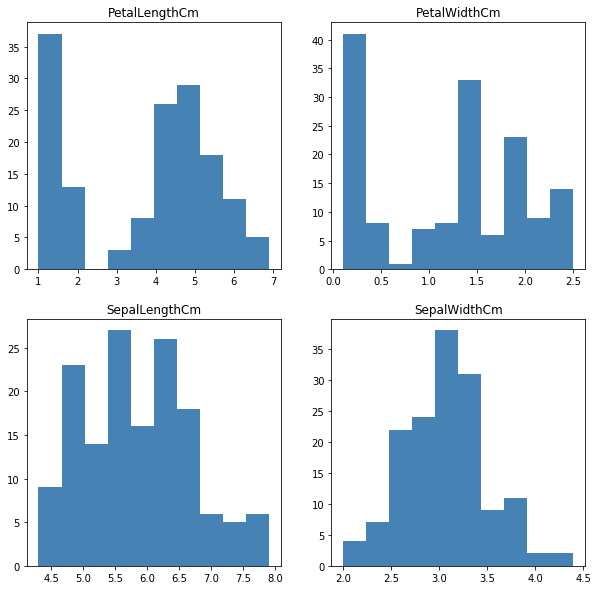

In [7]:
fig = plt.figure(figsize=(10, 10))
ax11 = fig.add_subplot(2, 2, 1)
ax11.hist(data.loc[:, 'PetalLengthCm'], histtype='stepfilled', color='steelblue', edgecolor='none')
ax11.set_title('PetalLengthCm')
ax12 = fig.add_subplot(2, 2, 2)
ax12.hist(data.loc[:, 'PetalWidthCm'], histtype='stepfilled', color='steelblue', edgecolor='none')
ax12.set_title('PetalWidthCm')
ax21 = fig.add_subplot(2, 2, 3)
ax21.hist(data.loc[:, 'SepalLengthCm'], histtype='stepfilled', color='steelblue', edgecolor='none')
ax21.set_title('SepalLengthCm')
ax22 = fig.add_subplot(2, 2, 4)
ax22.hist(data.loc[:, 'SepalWidthCm'], histtype='stepfilled', color='steelblue', edgecolor='none')
ax22.set_title('SepalWidthCm')

The dataset is quite clean and well balanced in each class so we procede to the other steps in preparation for training a model.

-----

We perfom a data preprocessing step and enlarge the original dataset to include a numerical label for 'Species' and the corresponding one-hot encoding. This is done in preparation for the later training step.

In [8]:
le = LabelEncoder()
le.fit(unique_species)

LabelEncoder()

In [9]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
species_label = le.transform(data.loc[:,'Species'])
species_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
data.loc[:,'Species_label'] = species_label
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
data = pd.get_dummies(data)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_label,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,0,1,0,0
1,2,4.9,3.0,1.4,0.2,0,1,0,0
2,3,4.7,3.2,1.3,0.2,0,1,0,0
3,4,4.6,3.1,1.5,0.2,0,1,0,0
4,5,5.0,3.6,1.4,0.2,0,1,0,0


In [13]:
data = data.drop('Id', axis=1)
data = shuffle(data)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_label,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
99,5.7,2.8,4.1,1.3,1,0,1,0
65,6.7,3.1,4.4,1.4,1,0,1,0
97,6.2,2.9,4.3,1.3,1,0,1,0
107,7.3,2.9,6.3,1.8,2,0,0,1
89,5.5,2.5,4.0,1.3,1,0,1,0


-----

Because the dataset is small, to address the performance of the model and the posibility of overfitting, we will plot the predictions on a lower dimension. We use PCA for dimensional reduction.

In [14]:
X = data.iloc[:,:4].values
Y = data.iloc[:,-3:].values
Y_labels = data.iloc[:,[4]].values

In [15]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

In [16]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
X_red = pca.transform(X)
X_pred = pca.inverse_transform(X_red)

In [18]:
np.mean(np.sum(np.square(X-X_pred), axis=1), axis=0)

0.10152555565202213

-----

Here we define and use a function to plot the transformed data points obtained by performing PCA in the last step.

In [19]:
def plot_pca():
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.axis([np.min(X_red[:,0])-0.1, np.max(X_red[:,0])+0.1, np.min(X_red[:,1])-0.1, np.max(X_red[:,1])+0.1])
    iris_setosa = np.where(Y_labels == np.where(le.classes_ == 'Iris-setosa')[0][0])[0]
    iris_versicolor = np.where(Y_labels == np.where(le.classes_ == 'Iris-versicolor')[0][0])[0]
    iris_virginica = np.where(Y_labels == np.where(le.classes_ == 'Iris-virginica')[0][0])[0]
    ax.plot(X_red[iris_setosa,0], X_red[iris_setosa,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='iris_setosa') 
    ax.plot(X_red[iris_versicolor,0], X_red[iris_versicolor,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='iris_versicolor') 
    ax.plot(X_red[iris_virginica,0], X_red[iris_virginica,1], marker='.', color='#00BA7F', markersize=10, linestyle='', label='iris_virginica') 
    ax.legend()

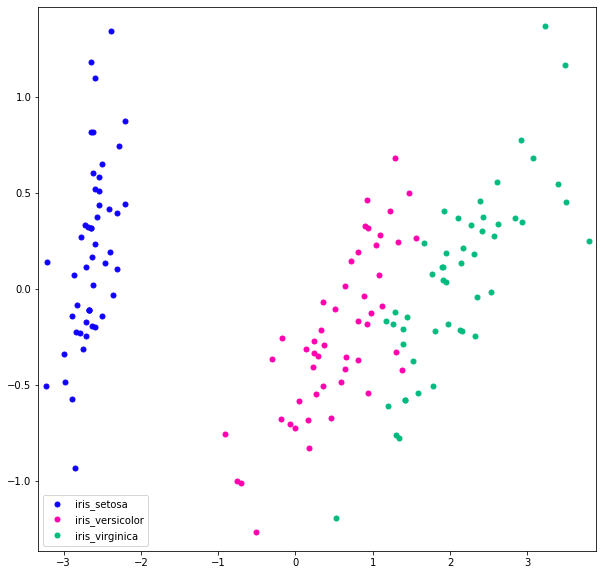

In [20]:
plot_pca()

-----

Here we define the function that trains the model.

In [21]:
def Model(dims):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Lambda(function=lambda x: (x-mu)/sigma,
                                     input_shape=[dims[0]]))
    for dim in dims[1:-1]:
        model.add(tf.keras.layers.Dense(units=dim, 
                                        activation='relu', 
                                        kernel_initializer='he_uniform', 
                                        bias_initializer='zeros'))
    model.add(tf.keras.layers.Dense(dims[-1], 
                                    activation='softmax', 
                                    kernel_initializer='he_uniform', 
                                    bias_initializer='zeros'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=100,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=200,
                                                 min_delta=0.001)
    model.fit(X, Y, epochs=10000, batch_size=32, callbacks=[callback1, callback2])
    return model

This function shows the training history of the model to see how is performing in every step 

In [22]:
def plot_model_training(model):
    loss = model.history.history['loss']
    accuracy = model.history.history['categorical_accuracy']
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('Loss')
    ax1.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='-')
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title('Accuracy')
    ax2.plot(accuracy, marker='.', color='#0F00FF', markersize=1, linestyle='-')

This function plots the results of the model obtained after training. The plotting is done at the level of the transformed data points by PCA. This gives us a way to visualize how well the model is performing, but also a feeling if there is some kind of overfitting because the display of complex and sinuose regions would be an indication of that. 

In [23]:
def plot_model(model):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.axis([np.min(X_red[:,0])-0.1, np.max(X_red[:,0])+0.1, np.min(X_red[:,1])-0.1, np.max(X_red[:,1])+0.1])
    u = np.linspace(np.min(X_red[:,0])-0.1, np.max(X_red[:,0])+0.1, 100)
    v = np.linspace(np.min(X_red[:,1])-0.1, np.max(X_red[:,1])+0.1, 100)
    z = []
    for i in range(100):
        for j in range(100):
            z.append([u[i], v[j]])
    z = np.array(z)
    z_ = pca.inverse_transform(z)
    w = np.argmax(model.predict(z_), axis=1)
    iris_setosa = np.where(w == np.where(le.classes_ == 'Iris-setosa')[0][0])[0]
    iris_versicolor = np.where(w == np.where(le.classes_ == 'Iris-versicolor')[0][0])[0]
    iris_virginica = np.where(w == np.where(le.classes_ == 'Iris-virginica')[0][0])[0]
    ax.plot(z[iris_setosa,0], z[iris_setosa,1], marker='+', color='#C7C3FF', markersize=10, linestyle='') 
    ax.plot(z[iris_versicolor,0], z[iris_versicolor,1], marker='+', color='#FFECFB', markersize=10, linestyle='') 
    ax.plot(z[iris_virginica,0], z[iris_virginica,1], marker='+', color='#C8FFB0', markersize=10, linestyle='') 
    iris_setosa = np.where(Y_labels == np.where(le.classes_ == 'Iris-setosa')[0][0])[0]
    iris_versicolor = np.where(Y_labels == np.where(le.classes_ == 'Iris-versicolor')[0][0])[0]
    iris_virginica = np.where(Y_labels == np.where(le.classes_ == 'Iris-virginica')[0][0])[0]
    ax.plot(X_red[iris_setosa,0], X_red[iris_setosa,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='iris_setosa') 
    ax.plot(X_red[iris_versicolor,0], X_red[iris_versicolor,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='iris_versicolor') 
    ax.plot(X_red[iris_virginica,0], X_red[iris_virginica,1], marker='.', color='#00BA7F', markersize=10, linestyle='', label='iris_virginica') 
    ax.legend()

-----

Here we train a basic Softmax model, an equivalent version of Linear Discriminant Analysis.

In [24]:
model_1 = Model([X.shape[1],Y.shape[1]])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train on 150 samples
Epoch 1/10000
150/150 [==============================] - 0s 2ms/sample - loss: 0.7845 - categorical_accuracy: 0.5667
Epoch 2/10000
150/150 [==============================] - 0s 70us/sample - loss: 0.7027 - categorical_accuracy: 0.5933
Epoch 3/10000
150/150 [==============================] - 0s 70us/sample - loss: 0.6367 - categorical_accuracy: 0.6400
Epoch 4/10000
150/150 [==============================] - 0s 58us/sample - loss: 0.5837 - categorical_accuracy: 0.7200
Epoch 5/10000
150/150 [=======

150/150 [==============================] - 0s 64us/sample - loss: 0.0986 - categorical_accuracy: 0.9733
Epoch 133/10000
150/150 [==============================] - 0s 75us/sample - loss: 0.0981 - categorical_accuracy: 0.9733
Epoch 134/10000
150/150 [==============================] - 0s 63us/sample - loss: 0.0975 - categorical_accuracy: 0.9733
Epoch 135/10000
150/150 [==============================] - 0s 63us/sample - loss: 0.0972 - categorical_accuracy: 0.9733
Epoch 136/10000
150/150 [==============================] - 0s 72us/sample - loss: 0.0967 - categorical_accuracy: 0.9733
Epoch 137/10000
150/150 [==============================] - 0s 69us/sample - loss: 0.0963 - categorical_accuracy: 0.9733
Epoch 138/10000
150/150 [==============================] - 0s 63us/sample - loss: 0.0958 - categorical_accuracy: 0.9733
Epoch 139/10000
150/150 [==============================] - 0s 64us/sample - loss: 0.0954 - categorical_accuracy: 0.9733
Epoch 140/10000
150/150 [==============================]

150/150 [==============================] - 0s 90us/sample - loss: 0.0669 - categorical_accuracy: 0.9733
Epoch 269/10000
150/150 [==============================] - 0s 81us/sample - loss: 0.0668 - categorical_accuracy: 0.9733
Epoch 270/10000
150/150 [==============================] - 0s 68us/sample - loss: 0.0667 - categorical_accuracy: 0.9733
Epoch 271/10000
150/150 [==============================] - 0s 81us/sample - loss: 0.0665 - categorical_accuracy: 0.9733
Epoch 272/10000
150/150 [==============================] - 0s 99us/sample - loss: 0.0664 - categorical_accuracy: 0.9733
Epoch 273/10000
150/150 [==============================] - 0s 61us/sample - loss: 0.0663 - categorical_accuracy: 0.9733
Epoch 274/10000
150/150 [==============================] - 0s 73us/sample - loss: 0.0662 - categorical_accuracy: 0.9733
Epoch 275/10000
150/150 [==============================] - 0s 77us/sample - loss: 0.0662 - categorical_accuracy: 0.9733
Epoch 276/10000
150/150 [==============================]

150/150 [==============================] - 0s 103us/sample - loss: 0.0564 - categorical_accuracy: 0.9800
Epoch 405/10000
150/150 [==============================] - 0s 70us/sample - loss: 0.0563 - categorical_accuracy: 0.9800
Epoch 406/10000
150/150 [==============================] - 0s 88us/sample - loss: 0.0563 - categorical_accuracy: 0.9800
Epoch 407/10000
150/150 [==============================] - 0s 86us/sample - loss: 0.0561 - categorical_accuracy: 0.9800
Epoch 408/10000
150/150 [==============================] - 0s 100us/sample - loss: 0.0561 - categorical_accuracy: 0.9800
Epoch 409/10000
150/150 [==============================] - 0s 82us/sample - loss: 0.0560 - categorical_accuracy: 0.9800
Epoch 410/10000
150/150 [==============================] - 0s 110us/sample - loss: 0.0561 - categorical_accuracy: 0.9800
Epoch 411/10000
150/150 [==============================] - 0s 80us/sample - loss: 0.0560 - categorical_accuracy: 0.9800
Epoch 412/10000
150/150 [============================

150/150 [==============================] - 0s 89us/sample - loss: 0.0512 - categorical_accuracy: 0.9800
Epoch 541/10000
150/150 [==============================] - 0s 61us/sample - loss: 0.0511 - categorical_accuracy: 0.9800
Epoch 542/10000
150/150 [==============================] - 0s 107us/sample - loss: 0.0512 - categorical_accuracy: 0.9800
Epoch 543/10000
150/150 [==============================] - 0s 92us/sample - loss: 0.0511 - categorical_accuracy: 0.9800
Epoch 544/10000
150/150 [==============================] - 0s 103us/sample - loss: 0.0510 - categorical_accuracy: 0.9800
Epoch 545/10000
150/150 [==============================] - 0s 68us/sample - loss: 0.0509 - categorical_accuracy: 0.9800
Epoch 546/10000
150/150 [==============================] - 0s 65us/sample - loss: 0.0510 - categorical_accuracy: 0.9800
Epoch 547/10000
150/150 [==============================] - 0s 97us/sample - loss: 0.0509 - categorical_accuracy: 0.9800
Epoch 548/10000
150/150 [=============================

150/150 [==============================] - 0s 90us/sample - loss: 0.0481 - categorical_accuracy: 0.9800
Epoch 677/10000
150/150 [==============================] - 0s 78us/sample - loss: 0.0481 - categorical_accuracy: 0.9800
Epoch 678/10000
150/150 [==============================] - 0s 70us/sample - loss: 0.0481 - categorical_accuracy: 0.9800
Epoch 679/10000
150/150 [==============================] - 0s 70us/sample - loss: 0.0481 - categorical_accuracy: 0.9800
Epoch 680/10000
150/150 [==============================] - 0s 57us/sample - loss: 0.0480 - categorical_accuracy: 0.9800
Epoch 681/10000
150/150 [==============================] - 0s 66us/sample - loss: 0.0480 - categorical_accuracy: 0.9800
Epoch 682/10000
150/150 [==============================] - 0s 68us/sample - loss: 0.0480 - categorical_accuracy: 0.9800
Epoch 683/10000
150/150 [==============================] - 0s 78us/sample - loss: 0.0479 - categorical_accuracy: 0.9800
Epoch 684/10000
150/150 [==============================]

150/150 [==============================] - 0s 59us/sample - loss: 0.0461 - categorical_accuracy: 0.9800
Epoch 813/10000
150/150 [==============================] - 0s 101us/sample - loss: 0.0462 - categorical_accuracy: 0.9800
Epoch 814/10000
150/150 [==============================] - 0s 79us/sample - loss: 0.0461 - categorical_accuracy: 0.9800
Epoch 815/10000
150/150 [==============================] - 0s 70us/sample - loss: 0.0461 - categorical_accuracy: 0.9800
Epoch 816/10000
150/150 [==============================] - 0s 70us/sample - loss: 0.0461 - categorical_accuracy: 0.9800
Epoch 817/10000
150/150 [==============================] - 0s 109us/sample - loss: 0.0461 - categorical_accuracy: 0.9800
Epoch 818/10000
150/150 [==============================] - 0s 66us/sample - loss: 0.0461 - categorical_accuracy: 0.9800
Epoch 819/10000
150/150 [==============================] - 0s 77us/sample - loss: 0.0460 - categorical_accuracy: 0.9800
Epoch 820/10000
150/150 [=============================

150/150 [==============================] - 0s 86us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 948/10000
150/150 [==============================] - 0s 59us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 949/10000
150/150 [==============================] - 0s 108us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 950/10000
150/150 [==============================] - 0s 104us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 951/10000
150/150 [==============================] - 0s 71us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 952/10000
150/150 [==============================] - 0s 112us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 953/10000
150/150 [==============================] - 0s 75us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 954/10000
150/150 [==============================] - 0s 68us/sample - loss: 0.0449 - categorical_accuracy: 0.9800
Epoch 955/10000
150/150 [============================

150/150 [==============================] - 0s 74us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1016/10000
150/150 [==============================] - 0s 85us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1017/10000
150/150 [==============================] - 0s 84us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1018/10000
150/150 [==============================] - 0s 68us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1019/10000
150/150 [==============================] - 0s 72us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1020/10000
150/150 [==============================] - 0s 83us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1021/10000
150/150 [==============================] - 0s 71us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1022/10000
150/150 [==============================] - 0s 57us/sample - loss: 0.0448 - categorical_accuracy: 0.9800
Epoch 1023/10000
150/150 [=======================

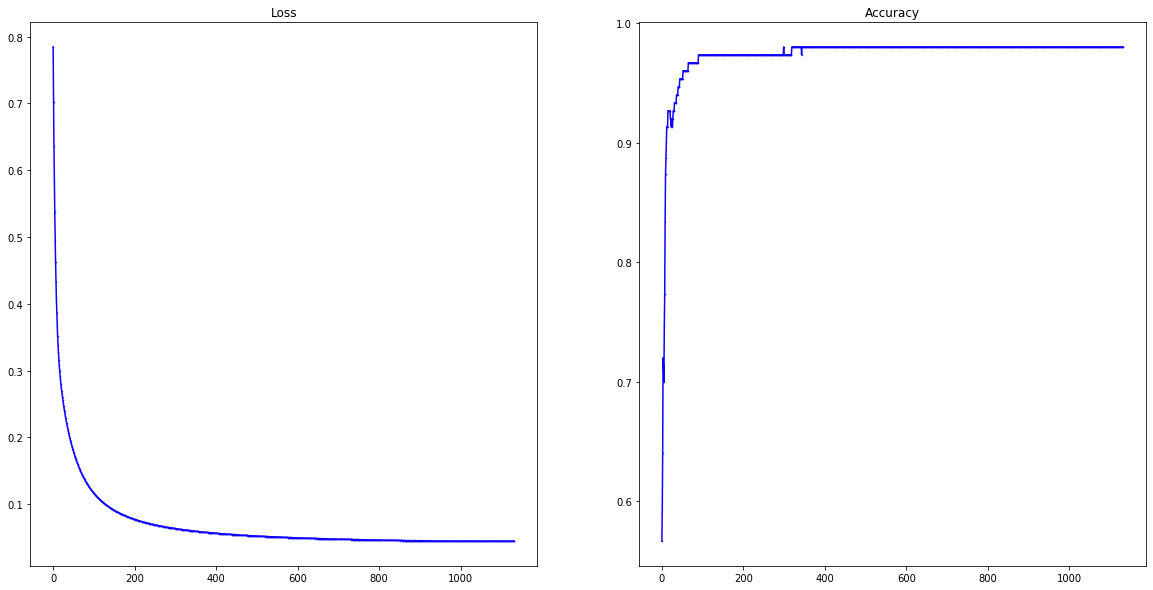

In [25]:
plot_model_training(model_1)

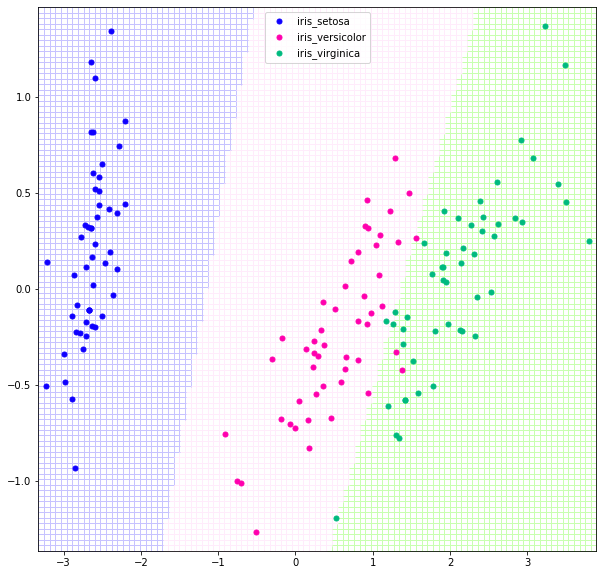

In [26]:
plot_model(model_1)

-----

Here we train a Shallow Neural Network to see how much we gain if we add some extra layers to the last model.

In [27]:
model_2 = Model([X.shape[1],64,Y.shape[1]])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________
Train on 150 samples
Epoch 1/10000
150/150 [==============================] - 0s 2ms/sample - loss: 0.8597 - categorical_accuracy: 0.5667
Epoch 2/10000
150/150 [==============================] - 0s 67us/sample - loss: 0.3400 - categorical_accuracy: 0.8533
Epoch 3/10000
150/150 [==============================] - 0s 80us/sample - loss: 0.2825 - categorical_accuracy: 0.8667
Epoch 4/1000

150/150 [==============================] - 0s 91us/sample - loss: 0.0141 - categorical_accuracy: 1.0000
Epoch 132/10000
150/150 [==============================] - 0s 108us/sample - loss: 0.0129 - categorical_accuracy: 1.0000
Epoch 133/10000
150/150 [==============================] - 0s 80us/sample - loss: 0.0131 - categorical_accuracy: 1.0000
Epoch 134/10000
150/150 [==============================] - 0s 84us/sample - loss: 0.0136 - categorical_accuracy: 0.9933
Epoch 135/10000
150/150 [==============================] - 0s 85us/sample - loss: 0.0134 - categorical_accuracy: 0.9933
Epoch 136/10000
150/150 [==============================] - 0s 76us/sample - loss: 0.0130 - categorical_accuracy: 1.0000
Epoch 137/10000
150/150 [==============================] - 0s 83us/sample - loss: 0.0125 - categorical_accuracy: 1.0000
Epoch 138/10000
150/150 [==============================] - 0s 94us/sample - loss: 0.0132 - categorical_accuracy: 0.9933
Epoch 139/10000
150/150 [==============================

150/150 [==============================] - 0s 99us/sample - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 268/10000
150/150 [==============================] - 0s 117us/sample - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 269/10000
150/150 [==============================] - 0s 94us/sample - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 270/10000
150/150 [==============================] - 0s 86us/sample - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 271/10000
150/150 [==============================] - 0s 89us/sample - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 272/10000
150/150 [==============================] - 0s 90us/sample - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 273/10000
150/150 [==============================] - 0s 84us/sample - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 274/10000
150/150 [==============================] - 0s 110us/sample - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 275/10000
150/150 [=============================

150/150 [==============================] - 0s 103us/sample - loss: 9.1191e-04 - categorical_accuracy: 1.0000
Epoch 403/10000
150/150 [==============================] - 0s 98us/sample - loss: 8.9410e-04 - categorical_accuracy: 1.0000
Epoch 404/10000
150/150 [==============================] - 0s 97us/sample - loss: 9.1310e-04 - categorical_accuracy: 1.0000
Epoch 405/10000
150/150 [==============================] - 0s 100us/sample - loss: 8.5604e-04 - categorical_accuracy: 1.0000
Epoch 406/10000
150/150 [==============================] - 0s 124us/sample - loss: 8.4463e-04 - categorical_accuracy: 1.0000
Epoch 407/10000
150/150 [==============================] - 0s 91us/sample - loss: 8.5246e-04 - categorical_accuracy: 1.0000
Epoch 408/10000
150/150 [==============================] - 0s 110us/sample - loss: 8.4120e-04 - categorical_accuracy: 1.0000
Epoch 409/10000
150/150 [==============================] - 0s 88us/sample - loss: 8.2759e-04 - categorical_accuracy: 1.0000
Epoch 410/10000
150/

150/150 [==============================] - 0s 59us/sample - loss: 5.6456e-04 - categorical_accuracy: 1.0000
Epoch 534/10000
150/150 [==============================] - 0s 67us/sample - loss: 5.6570e-04 - categorical_accuracy: 1.0000
Epoch 535/10000
150/150 [==============================] - 0s 101us/sample - loss: 5.6458e-04 - categorical_accuracy: 1.0000
Epoch 536/10000
150/150 [==============================] - 0s 64us/sample - loss: 5.6369e-04 - categorical_accuracy: 1.0000
Epoch 537/10000
150/150 [==============================] - 0s 66us/sample - loss: 5.6346e-04 - categorical_accuracy: 1.0000
Epoch 538/10000
150/150 [==============================] - 0s 76us/sample - loss: 5.6308e-04 - categorical_accuracy: 1.0000
Epoch 539/10000
150/150 [==============================] - 0s 69us/sample - loss: 5.6266e-04 - categorical_accuracy: 1.0000
Epoch 540/10000
150/150 [==============================] - 0s 62us/sample - loss: 5.6322e-04 - categorical_accuracy: 1.0000
Epoch 541/10000
150/150

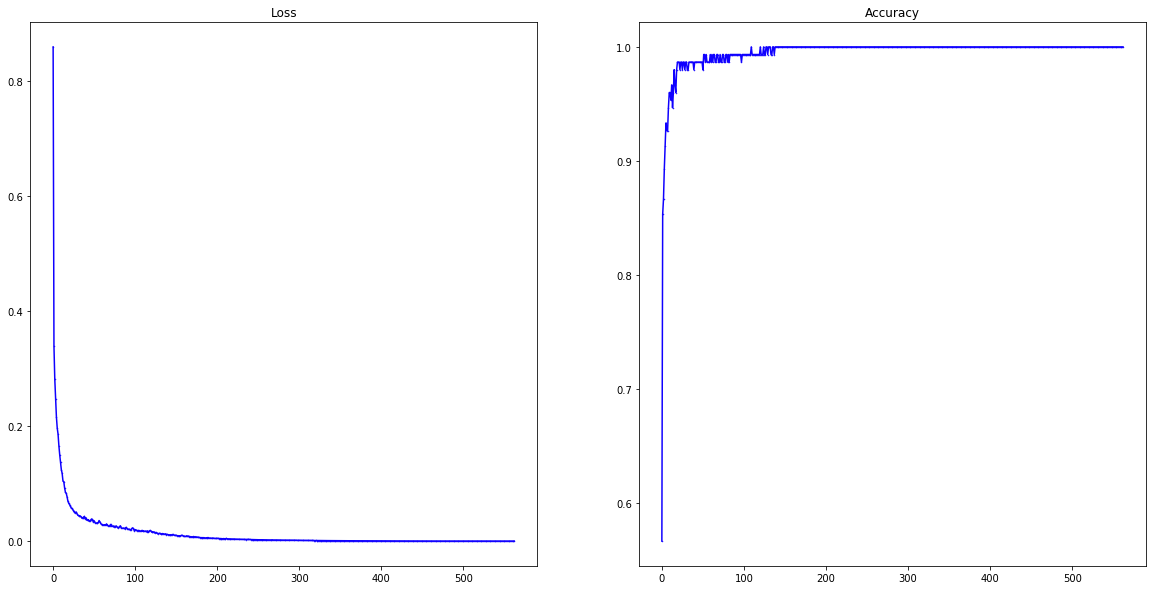

In [28]:
plot_model_training(model_2)

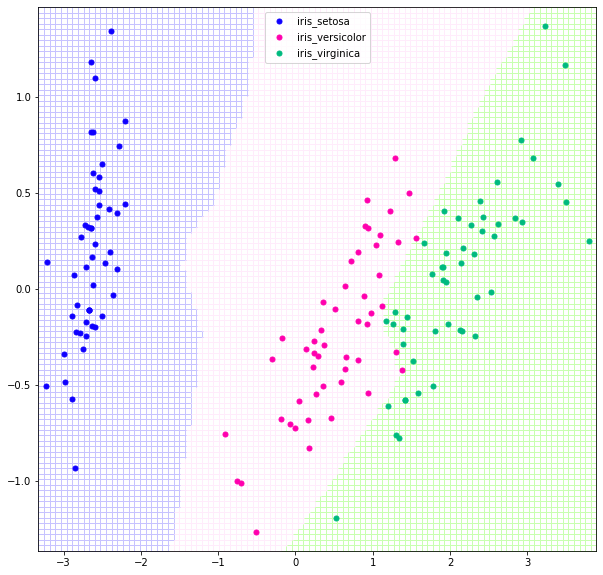

In [29]:
plot_model(model_2)

-----

Here we train a Deep Neural Network to see how much is gained from the last model.

In [30]:
model_3 = Model([X.shape[1],64,64,Y.shape[1]])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________
Train on 150 samples
Epoch 1/10000
150/150 [==============================] - 0s 2ms/sample - loss: 1.1329 - categorical_accuracy: 0.5267
Epoch 2/10000
150/150 [==============================] - 0s 55us/sample - loss: 0.3117 - categorical_accuracy: 0

150/150 [==============================] - 0s 64us/sample - loss: 5.2169e-04 - categorical_accuracy: 1.0000
Epoch 130/10000
150/150 [==============================] - 0s 102us/sample - loss: 5.1262e-04 - categorical_accuracy: 1.0000
Epoch 131/10000
150/150 [==============================] - 0s 58us/sample - loss: 5.2372e-04 - categorical_accuracy: 1.0000
Epoch 132/10000
150/150 [==============================] - 0s 54us/sample - loss: 4.9375e-04 - categorical_accuracy: 1.0000
Epoch 133/10000
150/150 [==============================] - 0s 72us/sample - loss: 5.0080e-04 - categorical_accuracy: 1.0000
Epoch 134/10000
150/150 [==============================] - 0s 82us/sample - loss: 4.8490e-04 - categorical_accuracy: 1.0000
Epoch 135/10000
150/150 [==============================] - 0s 60us/sample - loss: 5.0064e-04 - categorical_accuracy: 1.0000
Epoch 136/10000
150/150 [==============================] - 0s 64us/sample - loss: 4.7569e-04 - categorical_accuracy: 1.0000
Epoch 137/10000
150/150

150/150 [==============================] - 0s 74us/sample - loss: 1.4149e-04 - categorical_accuracy: 1.0000
Epoch 262/10000
150/150 [==============================] - 0s 66us/sample - loss: 1.4129e-04 - categorical_accuracy: 1.0000
Epoch 263/10000
150/150 [==============================] - 0s 62us/sample - loss: 1.4118e-04 - categorical_accuracy: 1.0000
Epoch 264/10000
150/150 [==============================] - 0s 60us/sample - loss: 1.4097e-04 - categorical_accuracy: 1.0000
Epoch 265/10000
150/150 [==============================] - 0s 80us/sample - loss: 1.4085e-04 - categorical_accuracy: 1.0000
Epoch 266/10000
150/150 [==============================] - 0s 75us/sample - loss: 1.4067e-04 - categorical_accuracy: 1.0000
Epoch 267/10000
150/150 [==============================] - 0s 62us/sample - loss: 1.4042e-04 - categorical_accuracy: 1.0000
Epoch 268/10000
150/150 [==============================] - 0s 55us/sample - loss: 1.4037e-04 - categorical_accuracy: 1.0000
Epoch 269/10000
150/150 

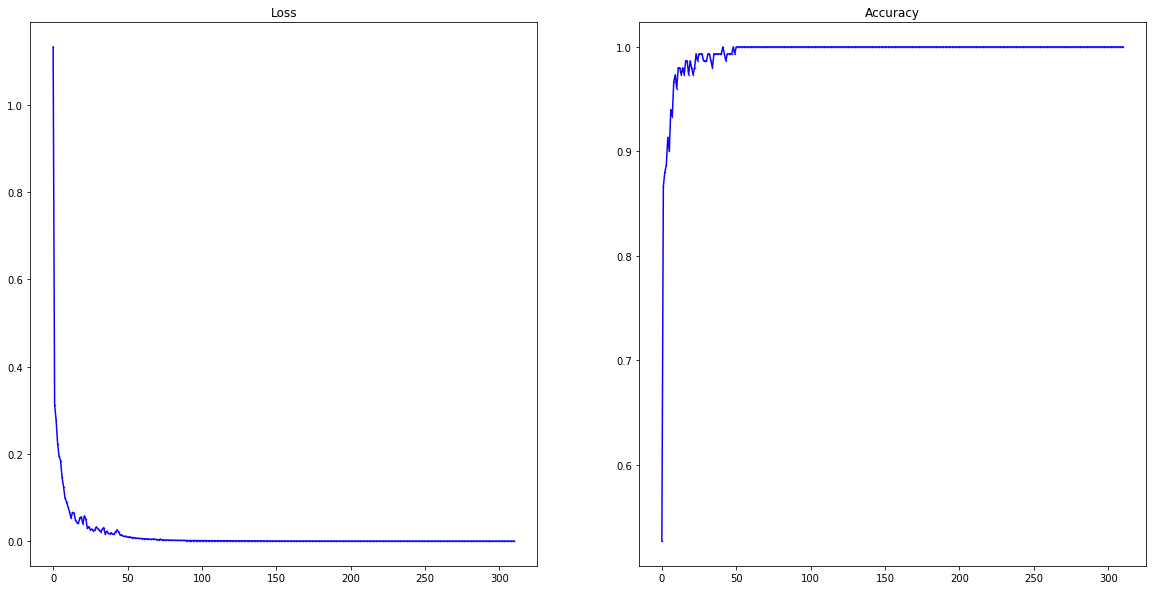

In [31]:
plot_model_training(model_3)

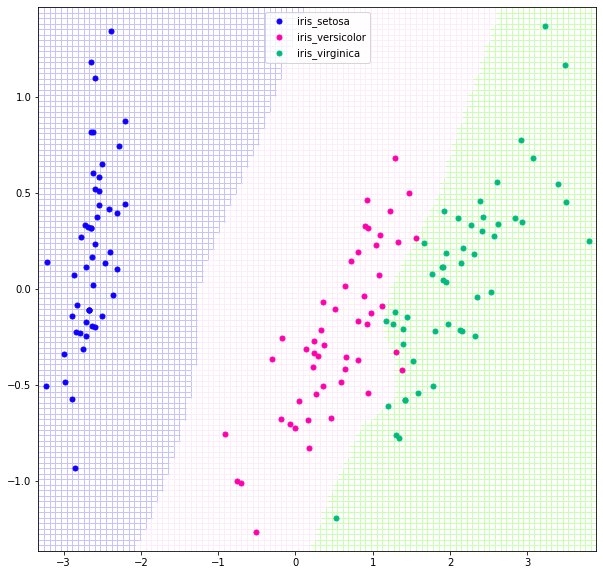

In [32]:
plot_model(model_3)

#### All models perform very well in the training dataset but as the graphics show, the last two of them adapt too much to the transformed data points which could be an indication of overfitting. The first model seems to be the most robust of all, so it could be considered a candidate solution for the original problem presented. Additional exploration of hyperparameters would be necessary to make a final conclusion.